In [0]:
'''
Created on Apr 28, 2019

@author: deckyal
'''

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls '/content/drive/My Drive//DeepLearningLabs/Lab2/data/'
myDrive = '/content/drive/My Drive/DeepLearningLabs/Lab2/data/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cat.10000.jpg  hr-train.npy   mnist	   res-test.npy   vgg-train.npy
CatDog	       inc.pt	      model.ckpt   res-train.npy
hr.pt	       inc-test.npy   models.ckpt  vgg.pt
hr-test.npy    inc-train.npy  res.pt	   vgg-test.npy


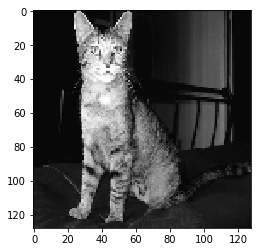

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2 

catImage =cv2.resize(cv2.imread(myDrive+'cat.10000.jpg',0),(128,128))
plt.imshow(catImage, cmap='gray')
plt.show()



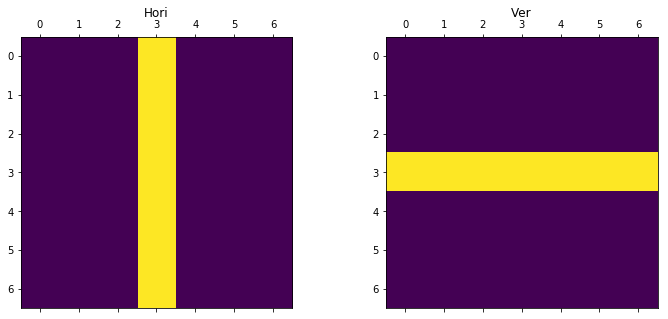

In [0]:

f_ver = np.zeros((7,7))
f_ver[:,3] = 1

f_hor = np.zeros((7,7))
f_hor[3,:] = 1


fig = plt.figure(figsize=(12,5))
axt = fig.add_subplot(1,2, 1)
plt.matshow(f_ver,fignum=False)
axt.set_title('Hori')

axt = fig.add_subplot(1,2, 2)
plt.matshow(f_hor,fignum=False)
axt.set_title('Ver')
plt.show()


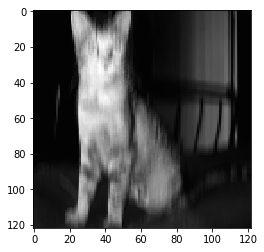

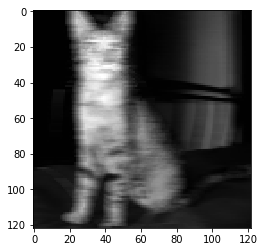

In [0]:
l_ver = signal.convolve2d(catImage,f_ver,'valid')
plt.imshow(l_ver, cmap='gray')
plt.show()

l_hor = signal.convolve2d(catImage,f_hor,'valid')
plt.imshow(l_hor, cmap='gray')
plt.show()

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


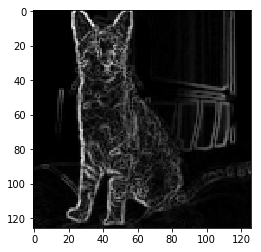

In [0]:

fx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
fy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

print(fx)

lx = signal.convolve2d(catImage,fx,'valid')
ly = signal.convolve2d(catImage,fy,'valid')

l_img = np.sqrt(lx**2)+np.sqrt(ly**2)
plt.imshow(l_img, cmap='gray')
plt.show()

In [0]:
import torch
import torch.nn as nn

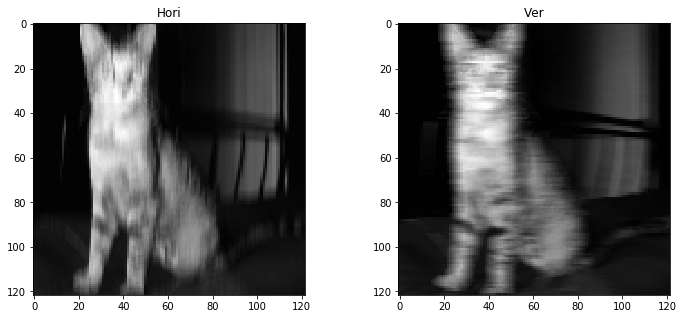

In [0]:
catImageT = torch.from_numpy(catImage).float()


conv1 = nn.Conv2d(1,1,7)
conv1.weight.data[0,0] =  torch.from_numpy(f_ver).float()

catImage1 = conv1(catImageT.unsqueeze(0).unsqueeze(0)) #Torch requires [batch, channel, H,W]
catImage1 = catImage1[0,0].detach().numpy()


conv2 = nn.Conv2d(1,1,7)
conv2.weight.data[0,0] =   torch.from_numpy(f_hor).float()

catImage2 = conv2(catImageT.unsqueeze(0).unsqueeze(0)) #Torch requires [batch, channel, H,W]
catImage2 = catImage2[0,0].detach().numpy()


fig = plt.figure(figsize=(12,5))
axt = fig.add_subplot(1,2, 1)
plt.imshow(catImage1, cmap='gray')
axt.set_title('Hori')

axt = fig.add_subplot(1,2, 2)
plt.imshow(catImage2, cmap='gray')
axt.set_title('Ver')
plt.show()

torch.Size([2, 1, 3, 3])


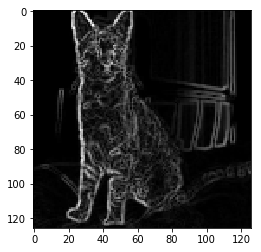

In [0]:
convEdge = nn.Conv2d(1,2,3)
print(convEdge.weight.data.shape)
convEdge.weight.data[0,0] =  torch.FloatTensor([[1,0,-1],[2,0,-2],[1,0,-1]])
convEdge.weight.data[1,0] =  torch.FloatTensor([[1,2,1],[0,0,0],[-1,-2,-1]])

catImage2 =convEdge(catImageT.unsqueeze(0).unsqueeze(0))

catImage2 =catImage2[0,0].pow(2).sqrt()+catImage2[0,1].pow(2).sqrt()
catImage2 = catImage2.detach().numpy()
plt.imshow(catImage2, cmap='gray')
plt.show()
